In [1]:
import random
import kmedoids

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from time import time
from kmedoids
from mpl_toolkits.mplot3d import Axes3D
from dissimilarity_matrix import DissimilarityMatrix
from data_preparation import DataPreparation
from sklearn_extra.cluster import KMedoids



In [2]:
# get path to multi resolution hic data
path_wt = '/home/elinfi/coolers/HiC_wt_001.mcool'
path_cancer = '/home/elinfi/coolers/HiC_cancer_001.mcool'

# resolution
resolution = 16000

# region of genome
region = 'chr4:10M-15M'

In [3]:
# create objects of class
wt = DataPreparation(path_wt, resolution, region)
cancer = DataPreparation(path_cancer, resolution, region)

In [4]:
# create balanced matrices (not necessary for the following steps)
wt.create_matrix()
cancer.create_matrix()

# divide matrices
diff = wt.divide(cancer)

/home/elinfi/clustering/data_preparation.py:62: RuntimeWarning: divide by zero encountered in true_divide
  diff = self.matrix/other.matrix
/home/elinfi/clustering/data_preparation.py:62: RuntimeWarning: invalid value encountered in true_divide
  diff = self.matrix/other.matrix


In [7]:
# calculate the distance matrix
dissimilarity = DissimilarityMatrix(diff, 'euclidean')

# using scipy.pdist
start = time()
distmat_scipy = dissimilarity.scipy_dist()
end = time()
print(f"Scipy: {end - start}")

#using sklearn.pairwise_distance
start = time()
distmat_sklearn = dissimilarity.sklearn_dist()
end = time()
print(f"Sklearn: {end - start}")

Scipy: 9.398127555847168
Sklearn: 9.378827333450317


In [9]:
# check if the two distance matrices are equal
print(np.sum(distmat_scipy != distmat_sklearn))

0


In [10]:
# find clusters using kmedoids fasterpam
c_scipy = kmedoids.fasterpam(distmat_scipy, 20, random_state=19)
c_sklearn = kmedoids.fasterpam(distmat_sklearn, 20, random_state=19)

In [11]:
# get labels for all clusters
labels_scipy = c_scipy.labels
labels_sklearn = c_sklearn.labels

In [74]:
# kmedoids_sklearn = KMedoids(n_clusters=20, random_state=0).fit(X)

In [13]:
# transform cluster labels to 2D array
n = dissimilarity.n
clusters_scipy = np.zeros((n, n))
upper_triag_idx = np.triu_indices(n)
clusters_scipy[upper_triag_idx] = labels_scipy
clusters_scipy = clusters_scipy + clusters_scipy.T
clusters_scipy[np.diag_indices(n)] /= 2

In [14]:
# transform cluster labels to 2D array
n = dissimilarity.n
clusters_sklearn = np.zeros((n, n))
upper_triag_idx = np.triu_indices(n)
clusters_sklearn[upper_triag_idx] = labels_sklearn
clusters_sklearn = clusters_sklearn + clusters_sklearn.T
clusters_sklearn[np.diag_indices(n)] /= 2

In [15]:
# create discrete colormap
cmap = plt.cm.gnuplot2
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

"\nax = axs[1]\nim = ax.imshow(diff,\n               norm=mpl.colors.LogNorm(),\n               cmap='bwr')\nplt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)\nax.set(title='Wild type raw data')\n"

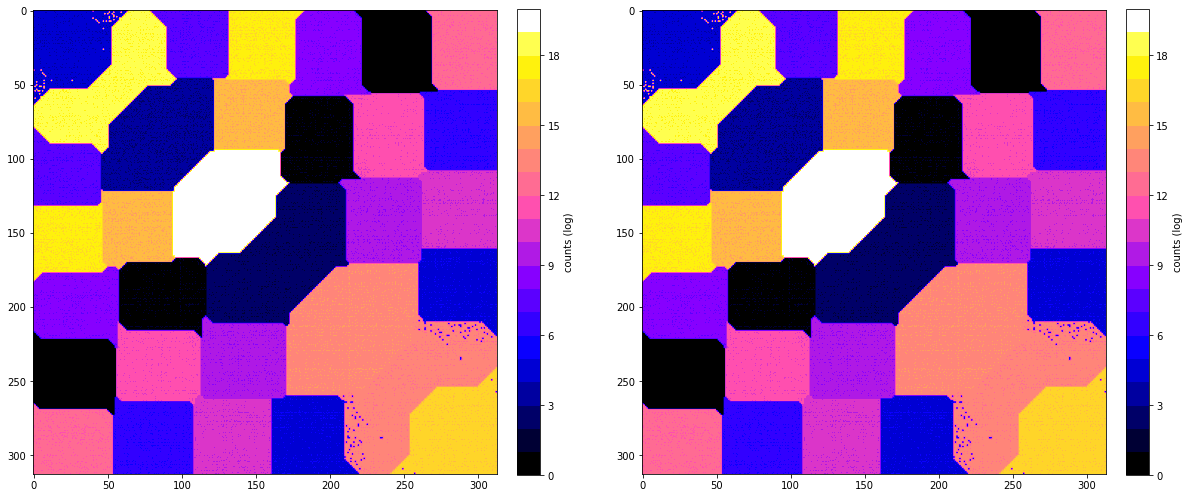

In [16]:
f, axs = plt.subplots(figsize=(20, 40),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
#im = ax.imshow(diff,
#               norm=mpl.colors.LogNorm(),
#               cmap='bwr')
im = ax.imshow(clusters_scipy,
              norm=norm,
              cmap=cmap,
              alpha=1)
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)

ax = axs[1]
im = ax.imshow(clusters_sklearn,
              norm=norm,
              cmap=cmap,
              alpha=1)
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)

"""
ax = axs[1]
im = ax.imshow(diff,
               norm=mpl.colors.LogNorm(),
               cmap='bwr')
plt.colorbar(im, fraction=0.046, pad=0.04, label='counts (log)', ax=ax)
ax.set(title='Wild type raw data')
"""